In [13]:
import pandas as pd
from pathlib import Path
csvpath = Path('../Resources/nasdaq.csv')

# Import NASDAQ stock prices
df = pd.read_csv(csvpath, parse_dates=True, index_col='Date')
%matplotlib inline

In [14]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Return
Date,,,,,,,
2012-01-03,25.030001,25.270000,24.910000,24.959999,21.894108,1468800,0.018360
2012-01-04,24.690001,24.799999,24.430000,24.620001,21.595875,1100900,-0.013622
2012-01-05,24.360001,24.719999,24.139999,24.660000,21.630962,1072200,0.001625
2012-01-06,24.629999,24.900000,24.379999,24.430000,21.429213,1192400,-0.009327
2012-01-09,24.410000,24.660000,24.270000,24.330000,21.341490,863900,-0.004093


<AxesSubplot:xlabel='Date'>

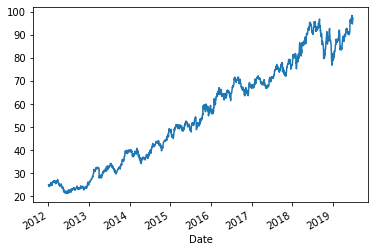

In [15]:
# The series is non-stationary (Trends upwards)
df.Close.plot()

In [16]:
# Transform into a stationary process
df['Return'] = df['Close'].pct_change()
df = df.dropna()
df.head()

,Open,High,Low,Close,Adj Close,Volume,Return
Date,,,,,,,
2012-01-04,24.690001,24.799999,24.430000,24.620001,21.595875,1100900,-0.013622
2012-01-05,24.360001,24.719999,24.139999,24.660000,21.630962,1072200,0.001625
2012-01-06,24.629999,24.900000,24.379999,24.430000,21.429213,1192400,-0.009327
2012-01-09,24.410000,24.660000,24.270000,24.330000,21.341490,863900,-0.004093
2012-01-10,24.580000,25.250000,24.490000,25.170000,22.078316,2647200,0.034525


In [18]:
# Select only the returns
returns = df.Return

<AxesSubplot:xlabel='Date'>

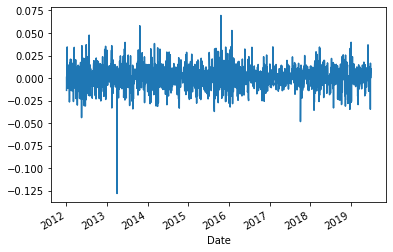

In [19]:
# Stationarity now seen
returns.plot()

# ARMA Model

In [20]:
# Import the ARMA model
from statsmodels.tsa.arima_model import ARMA

In [21]:
# Create the ARMA model using the return values and the order
# For the order parameter, the first 1 indicates the number of AR lags
# For the order parameter, the second 1 indicates the number of MA lags
model = ARMA(returns.values, order=(1,1))

C:\Users\email\Anaconda3\envs\dev\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [22]:
# Fit the model to the data
results = model.fit()

In [23]:
results.forecast(steps=10)

(array([0.00059603, 0.00066766, 0.00071423, 0.00074451, 0.0007642 ,
        0.00077701, 0.00078533, 0.00079075, 0.00079427, 0.00079656]),
 array([0.01252731, 0.01253317, 0.01253565, 0.01253669, 0.01253714,
        0.01253732, 0.0125374 , 0.01253744, 0.01253745, 0.01253746]),
 array([[-0.02395705,  0.02514911],
        [-0.02389691,  0.02523222],
        [-0.02385519,  0.02528364],
        [-0.02382696,  0.02531598],
        [-0.02380813,  0.02533654],
        [-0.02379569,  0.02534971],
        [-0.02378752,  0.02535819],
        [-0.02378217,  0.02536367],
        [-0.02377868,  0.02536722],
        [-0.0237764 ,  0.02536952]]))

<AxesSubplot:title={'center':'Stock Return Forecast'}>

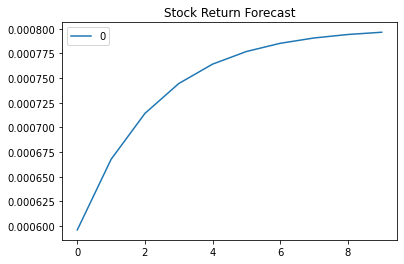

In [24]:
# Plot the forecasted return for the next 10 days
pd.DataFrame(results.forecast(steps=10)[0]).plot(title="Stock Return Forecast")

In [25]:
# Summarize the model
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 1884
Model:                     ARMA(1, 1)   Log Likelihood                5578.344
Method:                       css-mle   S.D. of innovations              0.013
Date:                Mon, 22 Mar 2021   AIC                         -11148.689
Time:                        17:24:52   BIC                         -11126.524
Sample:                             0   HQIC                        -11140.526
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0008      0.000      3.040      0.002       0.000       0.001
ar.L1.y        0.6502      0.258      2.516      0.012       0.144       1.157
ma.L1.y       -0.6808      0.249     -2.734      0.006      -1.169      -0.193
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.5379           +0.0000j            1.5379            0.0000
MA.1            1.4688           +0.0000j            1.4688            0.0000
-----------------------------------------------------------------------------
"""